# Import dependencies (in virtual environment): 


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Acquistion: 

Load the penguins.csv data from Seaborn:



In [2]:
# Load the dataset into a DataFrame 
df = sns.load_dataset('penguins')

# Inspect first rows of the DataFrame
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


# Initial Data Inspection:


In [3]:
# Display the first 10 rows of the DataFrame
print(df.head(10))

# Check the shape of the DataFrame
print(df.shape)

# Display the data types of each column
print(df.dtypes)


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       36

# Initial Descriptive Statistics: 


In [4]:
# Display summary statistics for each column using describe() method:
print(df.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


# Initial Data Distribution for Numerical Columns

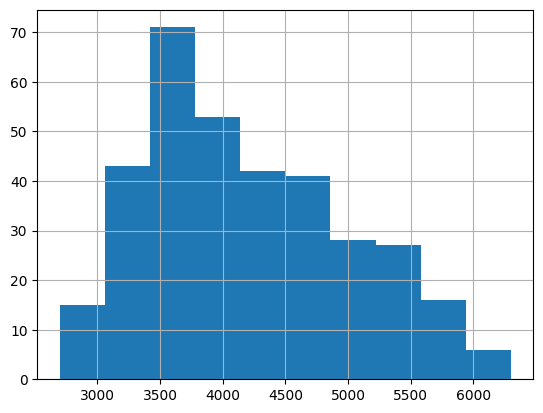

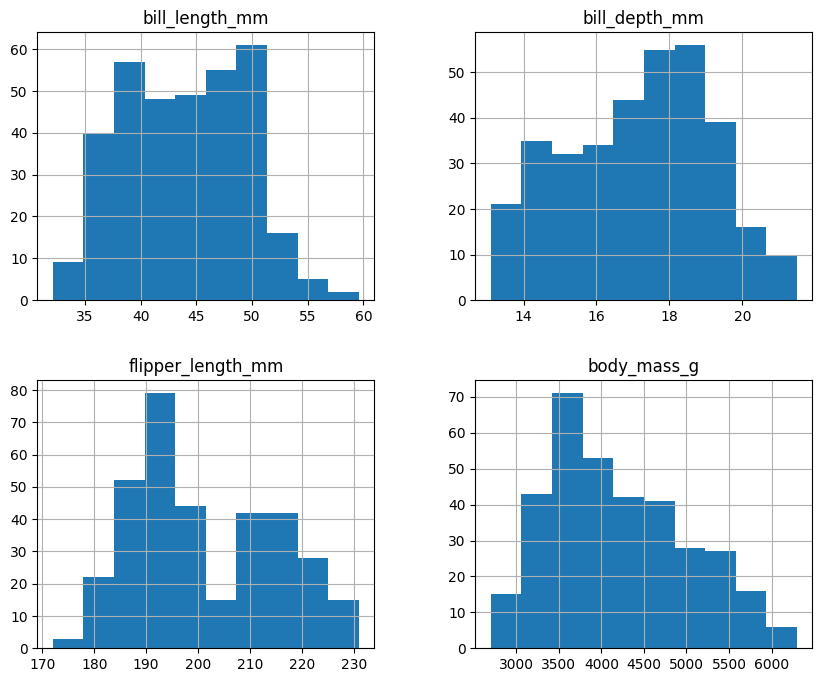

In [5]:
# Inspect histogram by numerical column

df['body_mass_g'].hist()

# Inspect histograms for all numerical columns
df.hist(figsize=(10, 8))

# Show all plots
plt.show()

Observation : The distribution of body mass indicate the presence of distinct size classes among the penguins. 

# Initial Data Distribution for Categorical Columns:

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


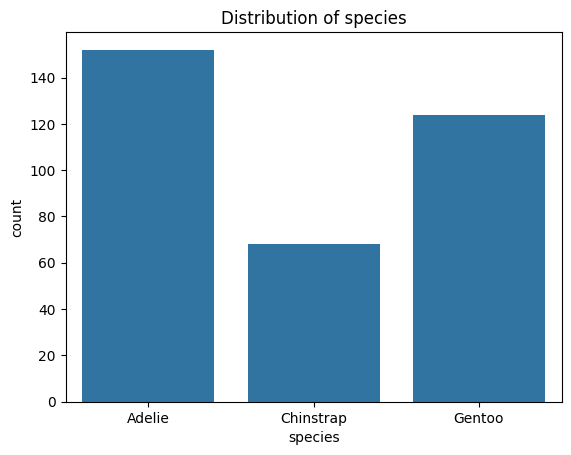

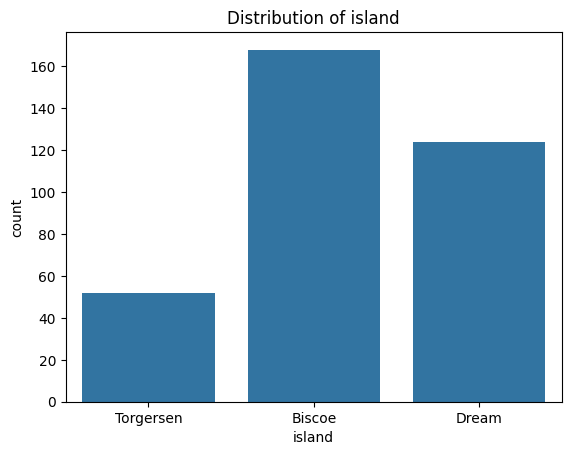

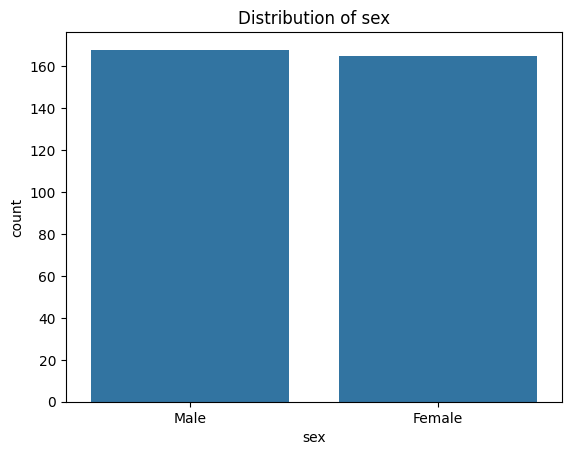

In [6]:
# Inspect value counts for the categorical column
print(df['species'].value_counts())

# Display count plots for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

Observation : 
The first graph indicates that Adele is the most populate species followed by Gentoo, and least populated species is Chinstarp. 
Second graph shows that Biscoe Island has most number of penguins whereas Torgersen has the least number of penguins.
The final graph indicates that there is not a significant difference between number of female and male penguins.

# Data Transformation


In [7]:
# Rename 'flipper_length_mm' to 'flipper_length_cm'
df.rename(columns={'sex': 'Gender'}, inplace=True)

# Add a new column for body mass in kilograms
df['body_mass_kg'] = df['body_mass_g'] / 1000

# Initial Visualizations
 
##  Subsection 1: Bodymass Distribution

### Goal: Analyze the distribution of body mass across the species.

Chart Type: Scatterplot
 
Chart: 


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'Gender', 'body_mass_kg'],
      dtype='object')


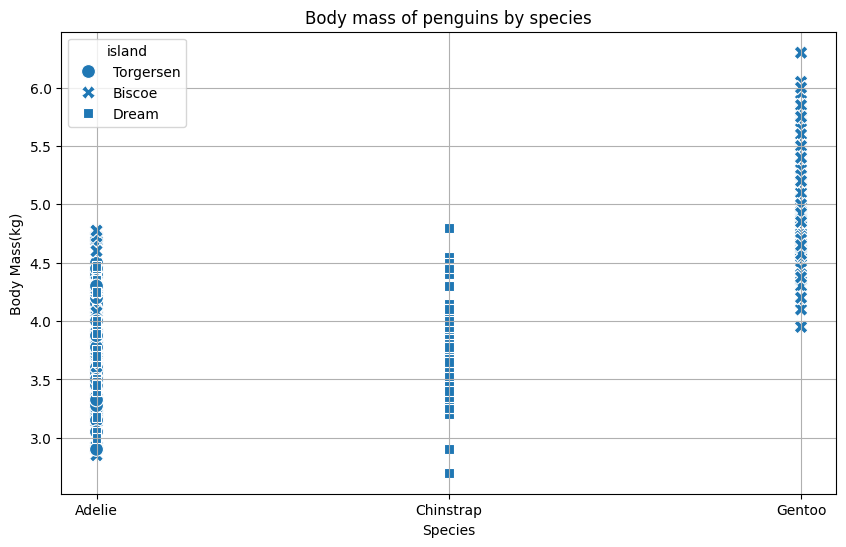

In [8]:
# Plotting the bodymass by species

print(df.columns)

# Convert body_mass_kg to numeric
df['body_mass_kg'] = pd.to_numeric(df['body_mass_kg'], errors='coerce')

plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x='species', y='body_mass_kg', style='island', s=100)


# Add labels and title
plt.xlabel('Species')
plt.ylabel('Body Mass(kg)')
plt.title('Body mass of penguins by species')

# Show the plot
plt.grid()
plt.show()

#### Story: 
The body mass distribution by species shows a similar profile for Adelie and Chinstarp species, but Gentoo penguins are heaviest.

##  Subsection 2: Bill length and species

### Goal: To analyze Relationship between bill length and species

Chart Type: Boxplot
 
Chart: 

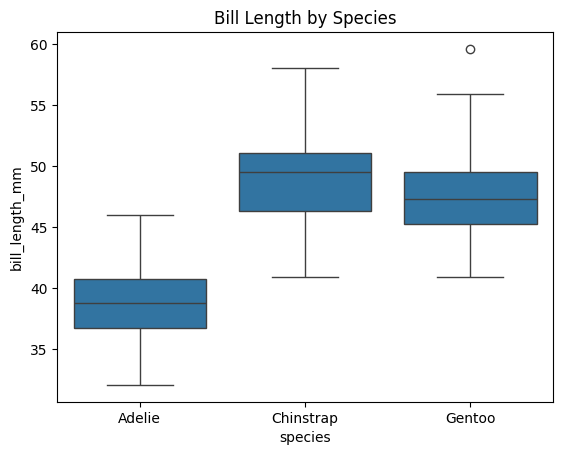

In [9]:
sns.boxplot(x='species', y='bill_length_mm', data=df)
plt.title('Bill Length by Species')
plt.show()

#### Story: 
The box plot indicates that Adelie has short bill as compared to Chinstarp and Gentoo species.

##  Subsection 3: Species distrubiton on islands.

### Goal: To analyze the distribution of species on islands.

Chart Type: Countplot
 
Chart: 

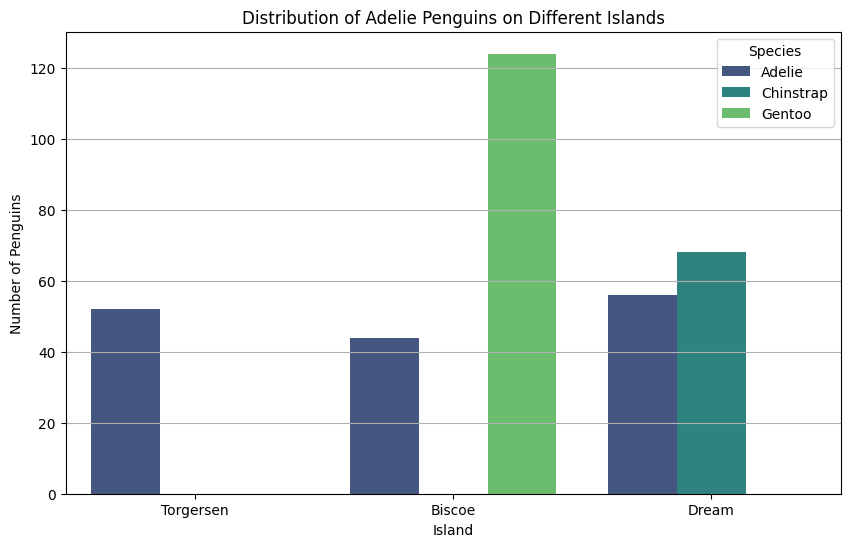

In [10]:

# Create a count plot to analyze the distribution of species on islands
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='island', hue='species', palette='viridis')

# Title and labels
plt.title('Distribution of Adelie Penguins on Different Islands')
plt.xlabel('Island')
plt.ylabel('Number of Penguins')
plt.legend(title='Species')
plt.grid(axis='y')
plt.show()


#### Story:
This graph effectively highlights the distribution of Adelie penguins among all the islands, meanwhile Chinstarp and Gentoo apecies are limited to one island each, separately. 

# Conclusion

This EDA highlights the essential insights into the penguins data. It is concluded that, habitat preferences, physical characteristics, and potential ecological factors influence the distribution of penguin species.